###### Notes:

- 

In [30]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pylab as plt


df = pd.read_csv("../Life Expectancy Data.csv")

_multi_miss_col = pd.DataFrame(df.isnull().sum(), columns = ["Null_Count"])
_missing_count = _multi_miss_col.query('Null_Count > 0')
_the_col =  _missing_count.index.values.tolist()

#Colum Drop:
drop_test = df.drop(_the_col, axis=1)
print(_missing_count)
print("Original Data: ", df.shape[1])
print("After column drop Data: ",drop_test.shape[1])

#row Drop
droptest2 = df.dropna()

print("Original Data: ", df.shape[0])
print("After row drop Data: ",droptest2.shape[0])

                                 Null_Count
Life expectancy                          10
Adult Mortality                          10
Alcohol                                 194
Hepatitis B                             553
 BMI                                     34
Polio                                    19
Total expenditure                       226
Diphtheria                               19
GDP                                     448
Population                              652
 thinness  1-19 years                    34
 thinness 5-9 years                      34
Income composition of resources         167
Schooling                               163
Original Data:  22
After column drop Data:  8
Original Data:  2938
After row drop Data:  1649


In [4]:
#Check thee target variable has missing data, If small enough we can drop:

target_var = df["Life expectancy "]

In [16]:
#row Drop
droptarget = target_var.dropna()

print("Original Data: ", target_var.shape[0])
print("After row drop Data: ",droptarget.shape[0])
print("Original Remaining: ",round((droptarget.shape[0]/target_var.shape[0])*100,2), "%")

Original Data:  2938
After row drop Data:  2928
Original Remaining:  99.66 %


In [21]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(round(perc_missing_per_ftr[perc_missing_per_ftr > 0]*100,2))
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',round(frac_missing*100,2), "%")

data dimensions: (2938, 22)
fraction of missing values in features:
Life expectancy                     0.34
Adult Mortality                     0.34
Alcohol                             6.60
Hepatitis B                        18.82
 BMI                                1.16
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
GDP                                15.25
Population                         22.19
 thinness  1-19 years               1.16
 thinness 5-9 years                 1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64 %
data types of the features with missing values:
Life expectancy                    float64
Adult Mortality                    float64
Alcohol                            float64
Hepatitis B                        float64
 BMI                               float64
Polio                              float64
Total expenditure                  

In [26]:
round(perc_missing_per_ftr[perc_missing_per_ftr > 0],2)

df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].columns


Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Text(0.5, 1.0, 'Missing Data')

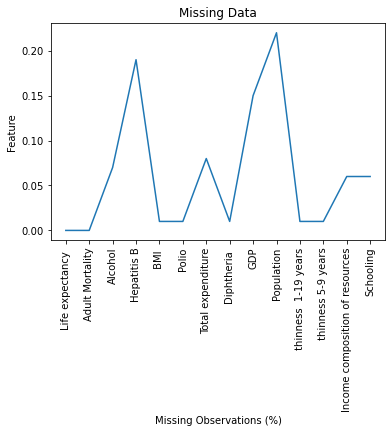

In [35]:
plt.plot(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].columns,
     round(perc_missing_per_ftr[perc_missing_per_ftr > 0],2))
plt.ylabel('Feature')
plt.xlabel('Missing Observations (%)')
plt.xticks(rotation=90)
plt.title('Missing Data')